# Data 601 HW 2 Spotify Technical Notebook

Sean Reidy, UMBC DATA 601, Fall 2020


## Abstract 

This project is an exploration of Spotify track data looking at different audio features from twelve different Spotify categories.  The notebook *getSpotifyData.ipynb* contains the process of calling the Spotify Web API, cleaning and processing and finally, saving the data to file.  

### Table Of Contents
 - **Part 1:** Loading the Data
 - **Part 2:** Overview of the Spotify Dataset
 - **Part 3:** EDA of Continuous Features
 - **Part 4:** EDA of Categorical Features
 - **Part 5:** Looking at the Differences among Spotify Categories
 - **Part 6:** Conclusions 
 
The Spotify dataset includes 9767 tracks, with 18 different features. Including:  track_id, artist, album, trackName, acousticness, danceability,duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, and valence. Detailed descriptions for these variables can be found in the Spotify Web API documentation [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) The data set contains the following spotify playlist catigetoes: Rock, Pop, Country, Hip Hop, EDM_Dance, Indie_alt, rnb, classical, jazz, punk, kpop, and metal. 

One of the overall questions I am curious about is: What are the defining characteristics of the different Spotify categories in the dataset? For example, Is a pop song more Danceable than a Jazz song?  

Some early intrestrings observations from the data show that Metal tracks have the highest energy while classical songs have the lowest.  Metal had a low mean danceability, indicating that a tracks energy may not correlated to danceability. 



## **Part 1:** Loading the Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#Read in Data 
spotify_df = pd.read_pickle('Data/spotify_df.pkl')

In [3]:
spotify_df.head()

track_id       artist  \
RapCaviar 0  7o4gBbTM6UBLkOYPw9xMCz          DDG   
          1  1RSzyxqtIO4yX3EyiV4zT5           CJ   
          2  4DuUwzP4ALMqpquHU0ltAB  Jack Harlow   
          3  0PvFJmanyNQMseIFrU708S    Pop Smoke   
          4  5SWnsxjhdcEDc7LJjq9UHk    21 Savage   

                                                         album  \
RapCaviar 0  Moonwalking in Calabasas (feat. Blueface) [Remix]   
          1                                            Whoopty   
          2                                        Tyler Herro   
          3               Shoot For The Stars Aim For The Moon   
          4                                     SAVAGE MODE II   

                                                     trackName  acousticness  \
RapCaviar 0  Moonwalking in Calabasas (feat. Blueface) - Remix       0.06140   
          1                                            Whoopty       0.19400   
          2                                        Tyler Herro       0.11000   
          3            For The Night (feat. Lil Baby & DaBaby)       0.11400   
          4                                             Runnin       0.00748   

             danceability duration_ms  energy instrumentalness key  liveness  \
RapCaviar 0         0.928      170233   0.341                0  11     0.162   
          1         0.714      123480   0.609                0   3     0.126   
          2         0.794      156498   0.756                0   5     0.247   
          3         0.823      190476   0.586                0   6     0.193   
          4         0.819      195906   0.626            0.101  10     0.167   

             loudness mode  speechiness    tempo time_signature  valence  \
RapCaviar 0   -10.196    0        0.103  129.966              4    0.745   
          1    -7.683    0        0.170  140.206              4    0.778   
          2    -7.160    0        0.136  123.066              4    0.775   
          3    -6.606    0        0.200  125.971              4    0.347   
          4    -4.574    0        0.202  143.010              4    0.415   

            category_id  
RapCaviar 0      hiphop  
          1      hiphop  
          2      hiphop  
          3      hiphop  
          4      hiphop

In [6]:
# Change data types of the following Columns, duration_ms -> int, instrumentalness -> float, 
# key -> int, mode -> int, time_signature -> int
spotify_df = spotify_df.astype({'duration_ms': int, 'instrumentalness': float,'key': int,'mode': int,'time_signature': int})

## **Part 2:** Overview of the Spotify Dataset

What are the Columns of the Dataset 

In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9767 entries, ('RapCaviar', 0) to ('Metal Talks | Napalm Death', 33)
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          9767 non-null   object 
 1   artist            9767 non-null   object 
 2   album             9767 non-null   object 
 3   trackName         9767 non-null   object 
 4   acousticness      9767 non-null   float64
 5   danceability      9767 non-null   float64
 6   duration_ms       9767 non-null   int64  
 7   energy            9767 non-null   float64
 8   instrumentalness  9767 non-null   float64
 9   key               9767 non-null   int64  
 10  liveness          9767 non-null   float64
 11  loudness          9767 non-null   float64
 12  mode              9767 non-null   int64  
 13  speechiness       9767 non-null   float64
 14  tempo             9767 non-null   float64
 15  time_signature    9767 non-null   int64  
 1

In [16]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,9767.000000,9767.000000,9.767000e+03,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000
mean,0.345536,0.523095,2.397020e+05,0.581396,0.267283,5.201392,0.172918,-10.475343,0.640115,0.075415,118.792483,3.894850,0.422423
std,0.380944,0.204015,9.648809e+04,0.305308,0.375933,3.517151,0.137040,7.537433,0.479991,0.080943,29.140045,0.448564,0.270516
min,0.000000,0.000000,2.190700e+04,0.000520,0.000000,0.000000,0.010900,-47.001000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009830,0.376000,1.832250e+05,0.341000,0.000001,2.000000,0.091350,-12.898000,0.000000,0.036400,97.025000,4.000000,0.180500
50%,0.144000,0.540000,2.177000e+05,0.652000,0.002450,5.000000,0.117000,-7.784000,1.000000,0.046400,120.000000,4.000000,0.400000
75%,0.746000,0.681000,2.689675e+05,0.845500,0.684000,8.000000,0.208000,-5.370000,1.000000,0.076300,135.678500,4.000000,0.639000
max,0.996000,0.979000,1.477040e+06,1.000000,0.990000,11.000000,0.979000,0.878000,1.000000,0.958000,218.107000,5.000000,0.982000


In [41]:
#What are the spotify catigories in the data

default_catigory = ["rock","pop","country","hiphop","edm_dance","indie_alt","rnb",
                 "classical","jazz","punk","kpop","metal"]

In [20]:
#how many unique spotify catigories?
spotify_df.category_id.nunique()

12

In [18]:
#how many unique tracks?
spotify_df.track_id.nunique()

8921

In [19]:
#how many unique artists?
spotify_df.artist.nunique()

5207

In [27]:
#What artists has the most tracks in the dataset?
spotify_df.artist.value_counts()[:50]

Various Artists                 285
Frédéric Chopin                  58
EXO                              41
Wolfgang Amadeus Mozart          40
Napalm Death                     39
Ludwig van Beethoven             31
Johann Sebastian Bach            29
John Williams                    27
Royal Philharmonic Orchestra     21
Pearl Jam                        18
Claude Debussy                   18
The Smashing Pumpkins            18
Hank Williams                    18
Nirvana                          18
The Rolling Stones               18
George Strait                    16
Antonio Vivaldi                  15
Elvis Presley                    15
Max Richter                      15
Blur                             15
AC/DC                            15
Tiësto                           14
David Bowie                      14
BAEKHYUN                         14
Thomas Newman                    13
Michael Giacchino                13
U2                               13
Guns N' Roses               

In [38]:
# What track titles are the most frequent in the dataset?
spotify_df.trackName.value_counts()[:15]

Rêverie, L. 68: Rêverie                                    7
Together                                                   7
Alright                                                    6
Main Title                                                 6
Fortunate Son                                              5
Underwater                                                 5
Home                                                       5
You                                                        5
Cello Suite No. 1 in G Major, BWV 1007: I. Prélude         5
Alive                                                      5
Zombie                                                     5
Black Hole Sun                                             5
Dreams                                                     5
Sechs Klavierstücke, Op. 118: II. Intermezzo in A Major    5
Chopin: Nocturne No. 20 in C-Sharp Minor, Op. Posth.       5
Name: trackName, dtype: int64

In [42]:
# how many tracks does each category in the dataset have 
spotify_df.category_id.value_counts()

classical    1898
edm_dance    1394
rock         1195
country       956
metal         864
indie_alt     820
kpop          673
jazz          662
rnb           602
hiphop        468
pop           135
punk          100
Name: category_id, dtype: int64


Some catigories have more tracks than others, this could introduce bias in the data.

 - Pop only has two playlist in the dataset
 - punk only has two playlist in the dataset
 
This could indicate an issue with how data was pulled from the spotify API, for future projects look into adding way to make sure that a even number of tracks is pulled for each category
 


## **Part 3:** EDA of Continuous Features

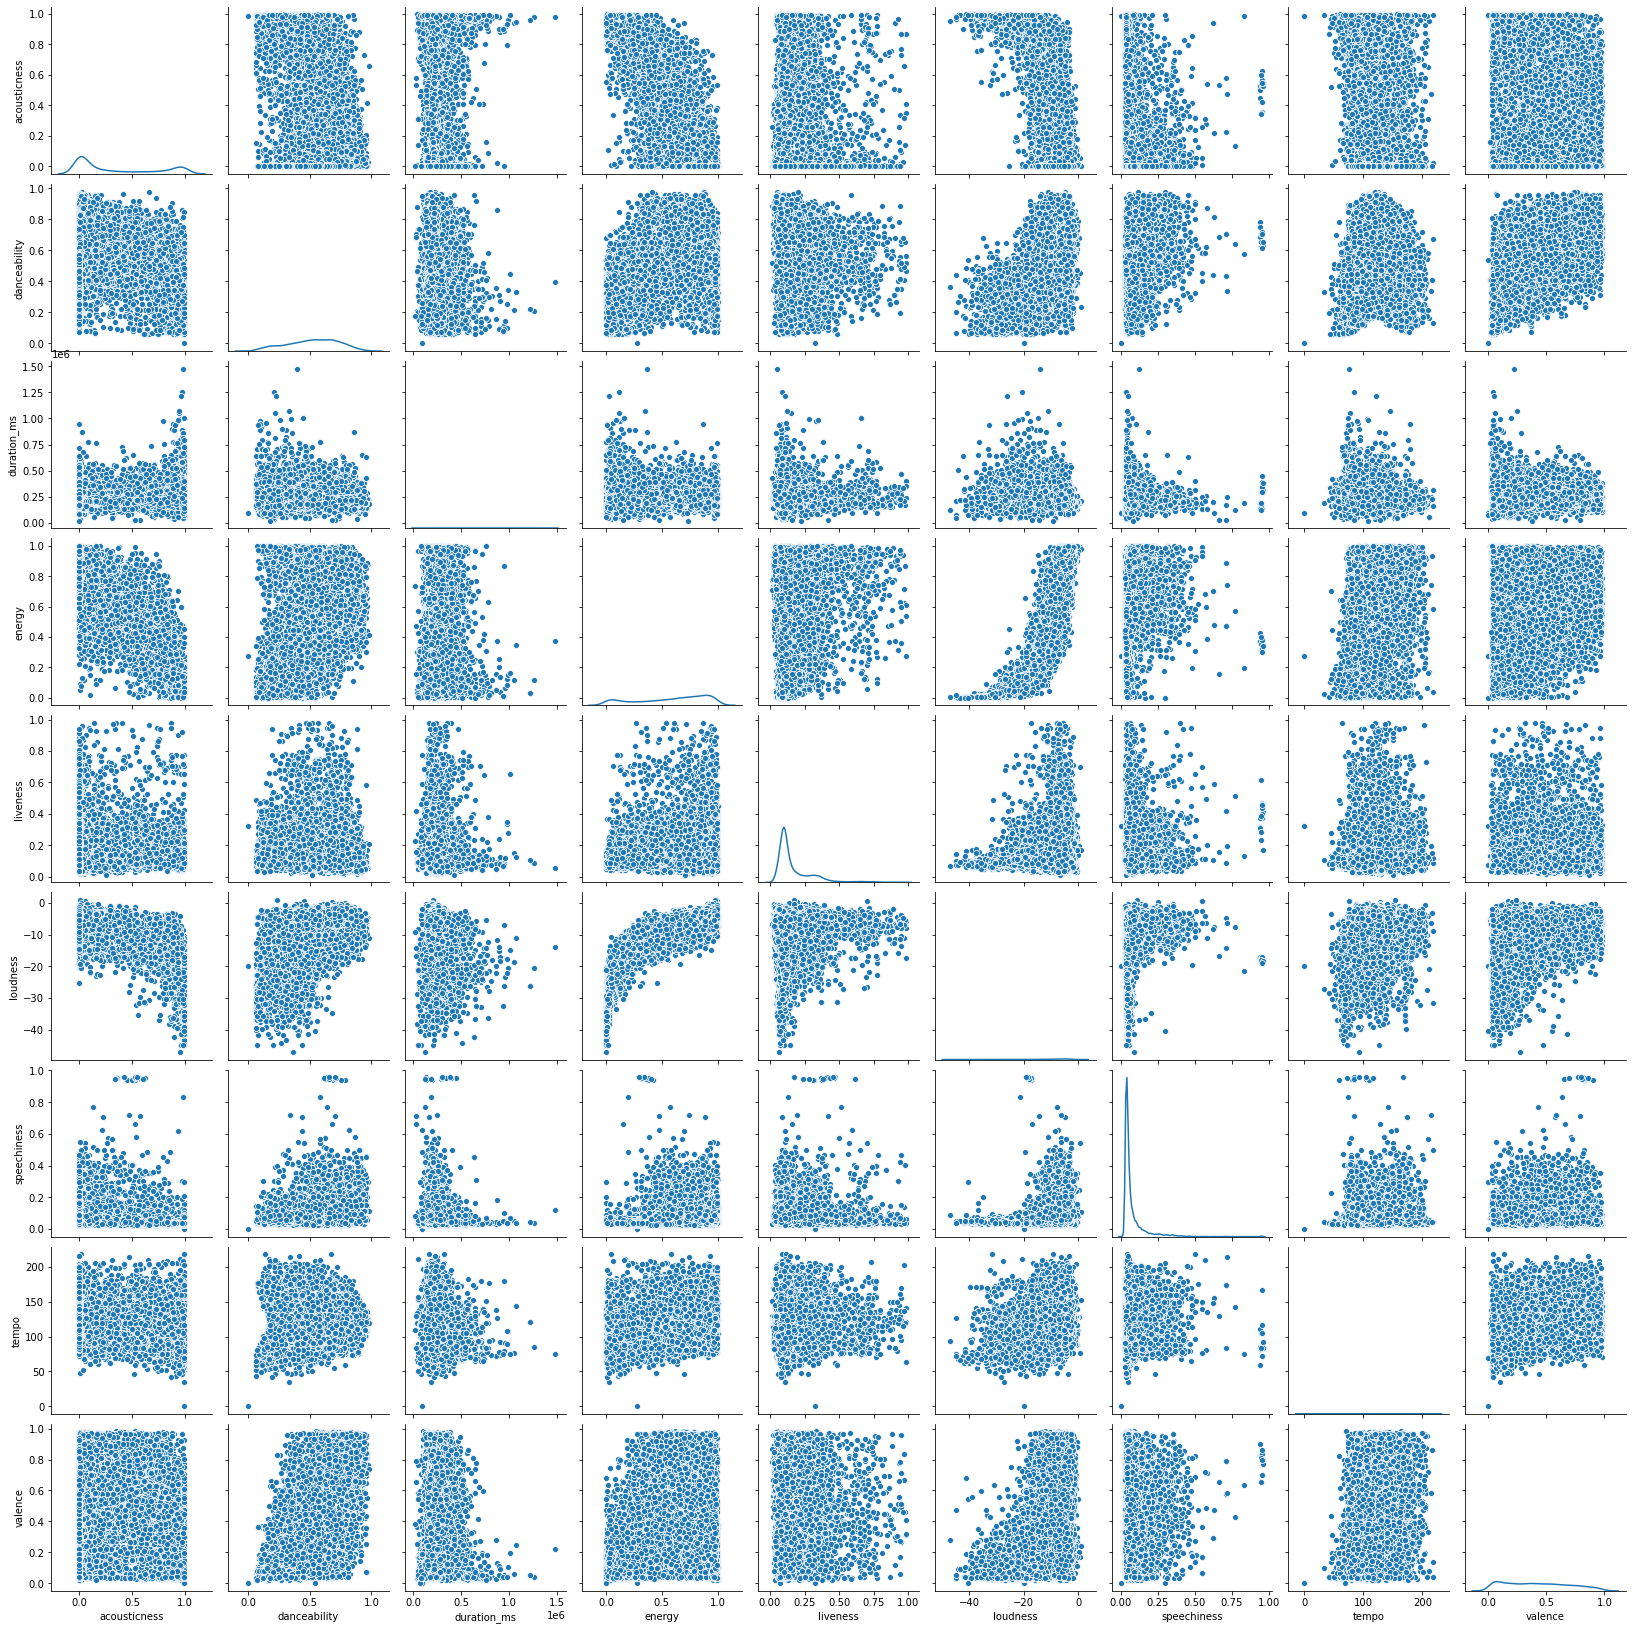

In [46]:
continuious_vars = ['acousticness', 'danceability','duration_ms', 'energy','liveness','loudness','speechiness','tempo','valence']
continuious_vars_pairs_plot = sns.PairGrid(spotify_df, vars = continuious_vars)
#continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_offdiag(sns.scatterplot)
#continuious_vars_pairs_plot.fig.suptitle("Spotify Audio Features Pairs Plot")

Text(0.5, 1.0, 'Spotify Audio Features Correlation Matrix')

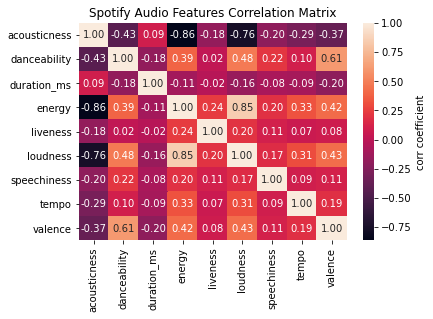

In [47]:
# Checking correlations coefficients 
ax =sns.heatmap(spotify_df[continuious_vars].corr(),annot=True, fmt=".2f", cbar_kws={'label': 'corr coefficient'})
ax.set_title("Spotify Audio Features Correlation Matrix")


### Notes on Continious Variables 

#### Distributions  

 - acousticness appears to be bimodal, with a slightly higher concentration of tracks at a lower accousticness value. This could indicate that the accoustiness of a track is "all or nothing", would be interesting to look into this feature as a predictor of track genre. MEAN: 0.345536 STD: 0.380944
 - danceability is unimodal, and appears normally distributed. MEAN: 0.523095 STD:0.204015
 - energy is bimodal with two modes at the far ends of the value ranges, but there are more higher energy tracks than low energy tracks in the dataset. MEAN: 0.581396 STD: 0.305308     
 - liveness has a strong right skew and may have two modes, should use higher bin count histogram to look at distribution closer. MEAN: 0.172918 STD: 0.137040     
 - speechiness is heavily right skewed. MEAN: 0.075415 STD:0.080943
 - valence exhibits only a very slight right skew but is fairly evenly distributed. MEAN:0.422423 STD:0.270516
 
#### Variable Interactions Insights 
 
 - The plot inidcates that there is a strong postive relationship between the energy and loundness of a track
 - There could be a very slight positive interaction betwwen a track's energy and danceability
 - A positive relationship between loudness and danceability should be looked into, some track catigories could have simmilar loudness, danceability and loudness (look at edm_dance)
 - Plots indicates that valence has interactions with tempo,loudness, duration_ms, and danceability 
 - There is a strong postive relationship *0.61* between a track's dancabilidy and its valence (or precived happyness) indicating that upbeat songs are generaly more dancable 
 

 


## **Part 4:** EDA of Categorical Features

#### Key

From [Spotify Web API refrence](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) 

<blockquote>
    The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
</blockquote> 

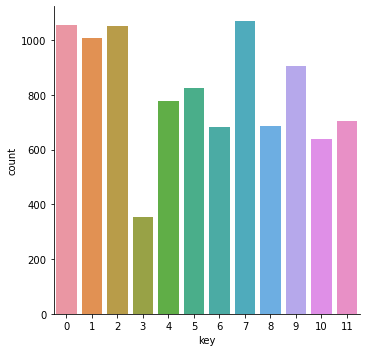

In [48]:
# Track Key
sns.catplot(x='key', kind = 'count', data = spotify_df)

 - Some of the most common keys is G, C, D and C#
 - The least commonly occuring key is D#

How does the key catigory interact with the continuious variables?

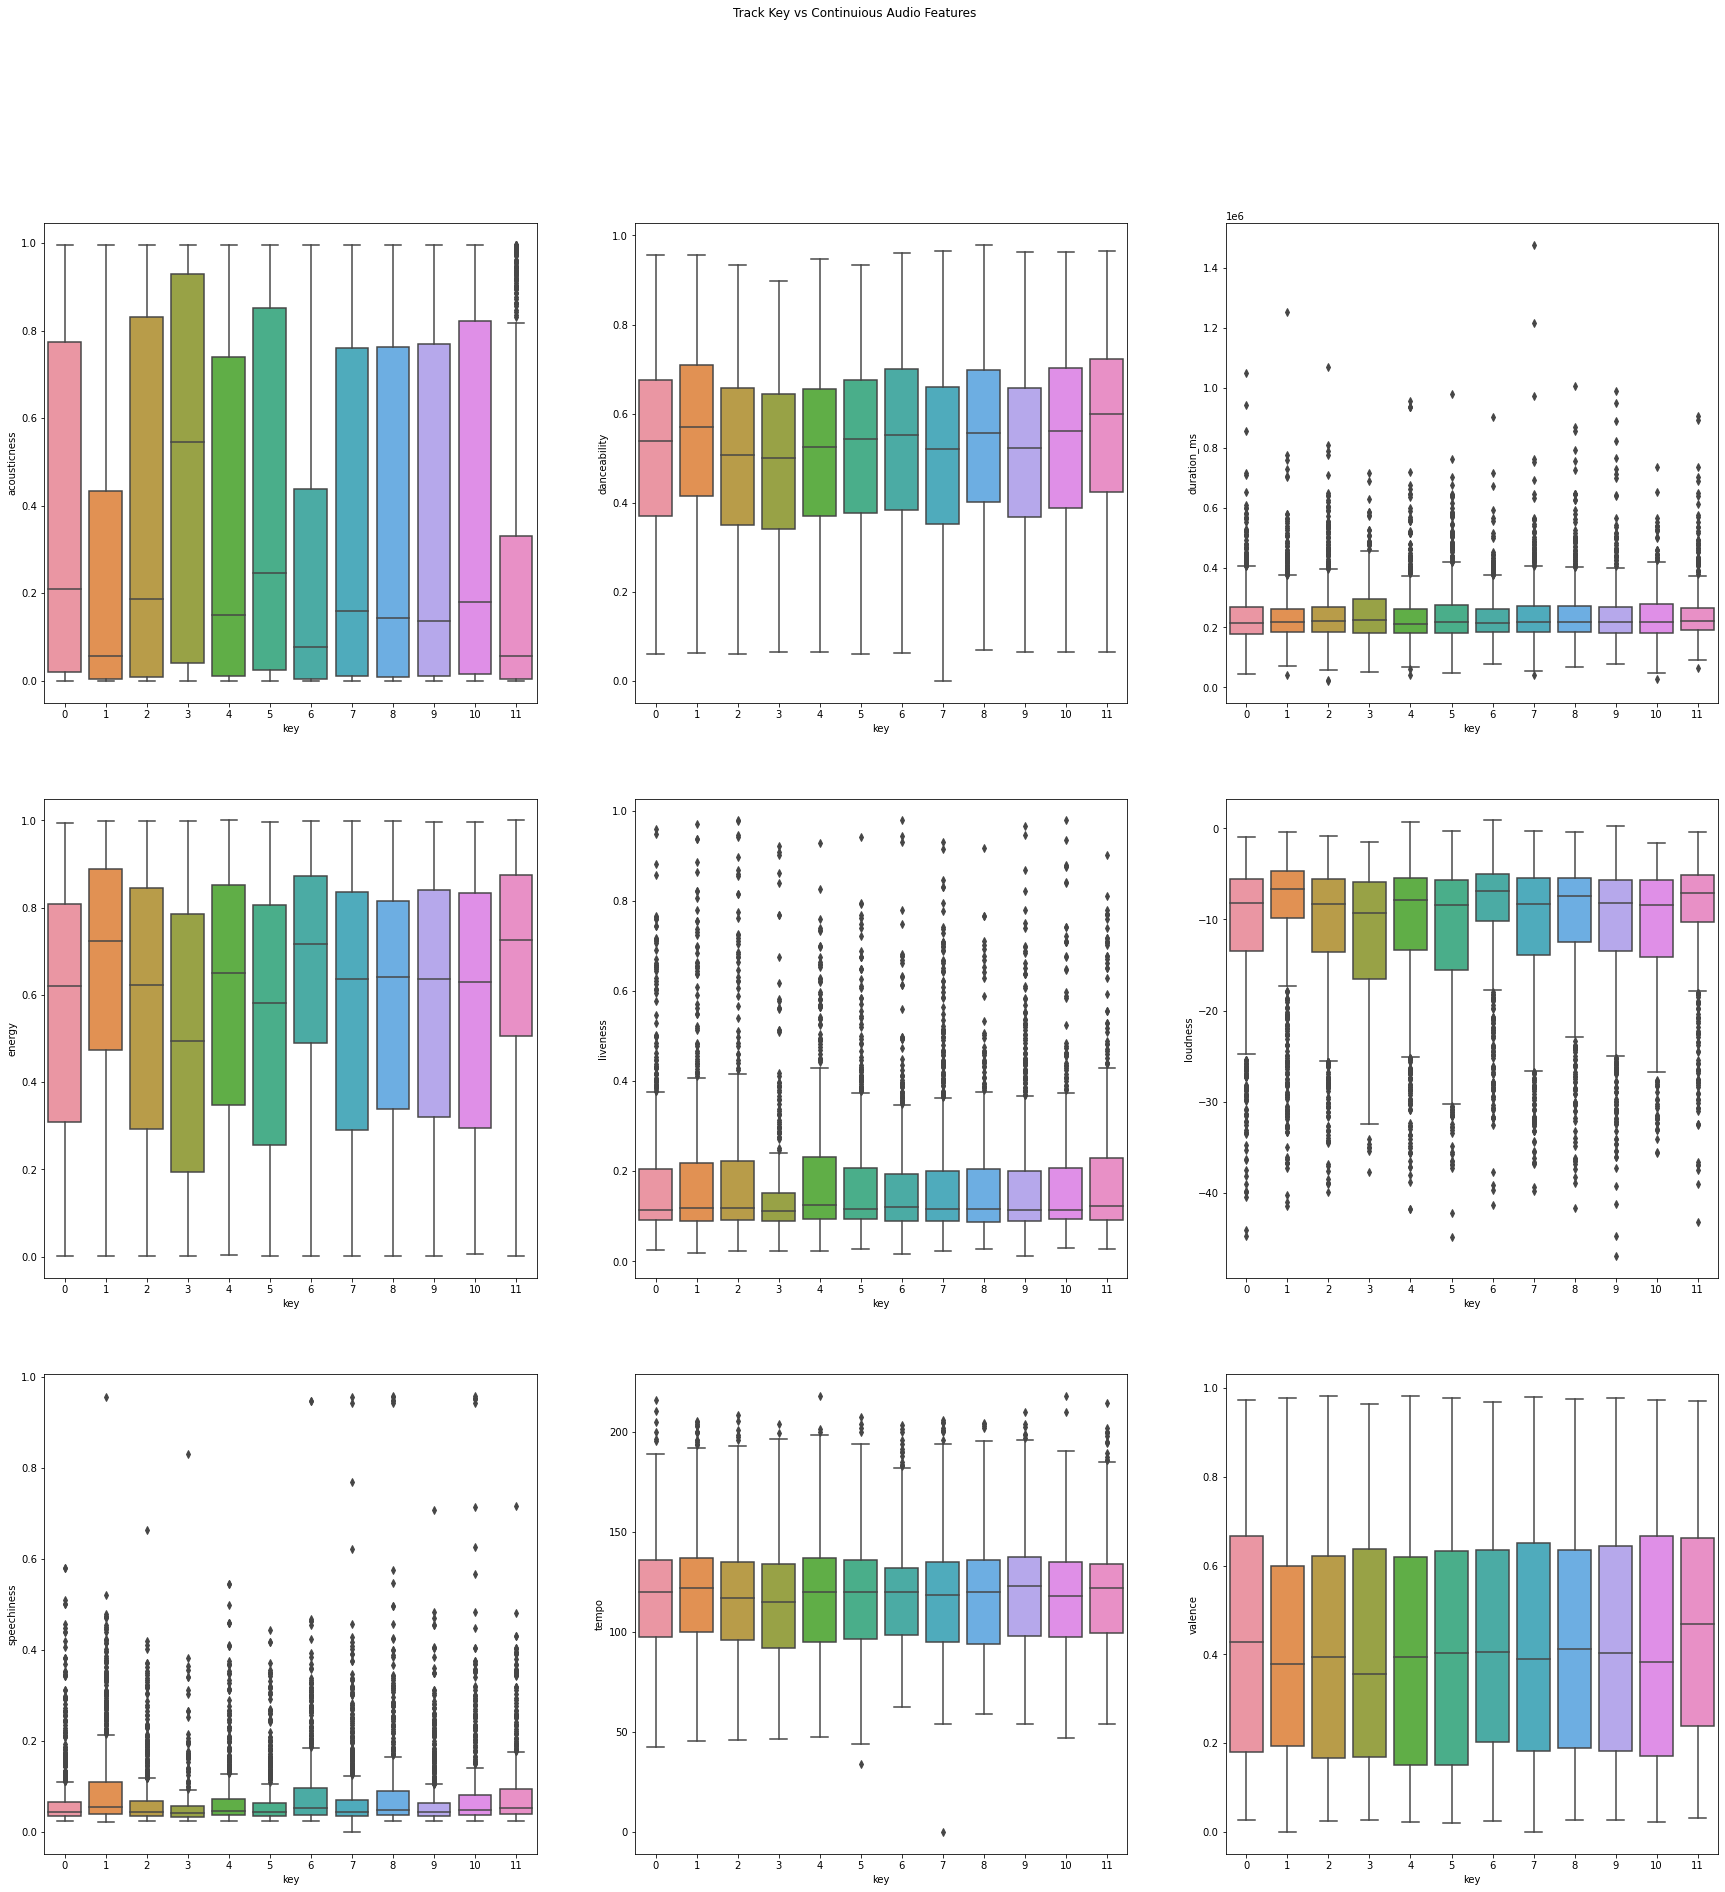

In [56]:
fig, axes = plt.subplots(3,3,figsize=(30, 30))
fig.suptitle("Track Key vs Continuious Audio Features")

#acousticness
sns.boxplot(ax = axes[0,0],data = spotify_df, x = "key", y = 'acousticness')

#danceability
sns.boxplot(ax = axes[0,1],data = spotify_df, x = "key", y = 'danceability')

#duration_ms
sns.boxplot(ax = axes[0,2],data = spotify_df, x = "key", y = 'duration_ms')

#energy
sns.boxplot(ax = axes[1,0],data = spotify_df, x = "key", y = 'energy')

#liveness
sns.boxplot(ax = axes[1,1],data = spotify_df, x = "key", y = 'liveness')

#loudness
sns.boxplot(ax = axes[1,2],data = spotify_df, x = "key", y = 'loudness')

#speechiness
sns.boxplot(ax = axes[2,0],data = spotify_df, x = "key", y = 'speechiness')

#tempo
sns.boxplot(ax = axes[2,1],data = spotify_df, x = "key", y = 'tempo')

#valence
sns.boxplot(ax = axes[2,2],data = spotify_df, x = "key", y = 'valence')


##### Notes 

 - A track's key doesn not appear to have much efect on the various catigorical features of a track, with the execption of a tracks acousticness were some keys such as 3 (D#) have a higher mean acousticness

#### Mode

From [Spotify Web API refrence](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) 

<blockquote>
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
</blockquote> 

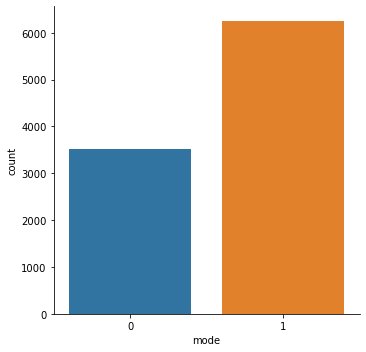

In [57]:
sns.catplot(x='mode', kind = 'count', data = spotify_df)

 - Most tracks in the data set are in a major modality

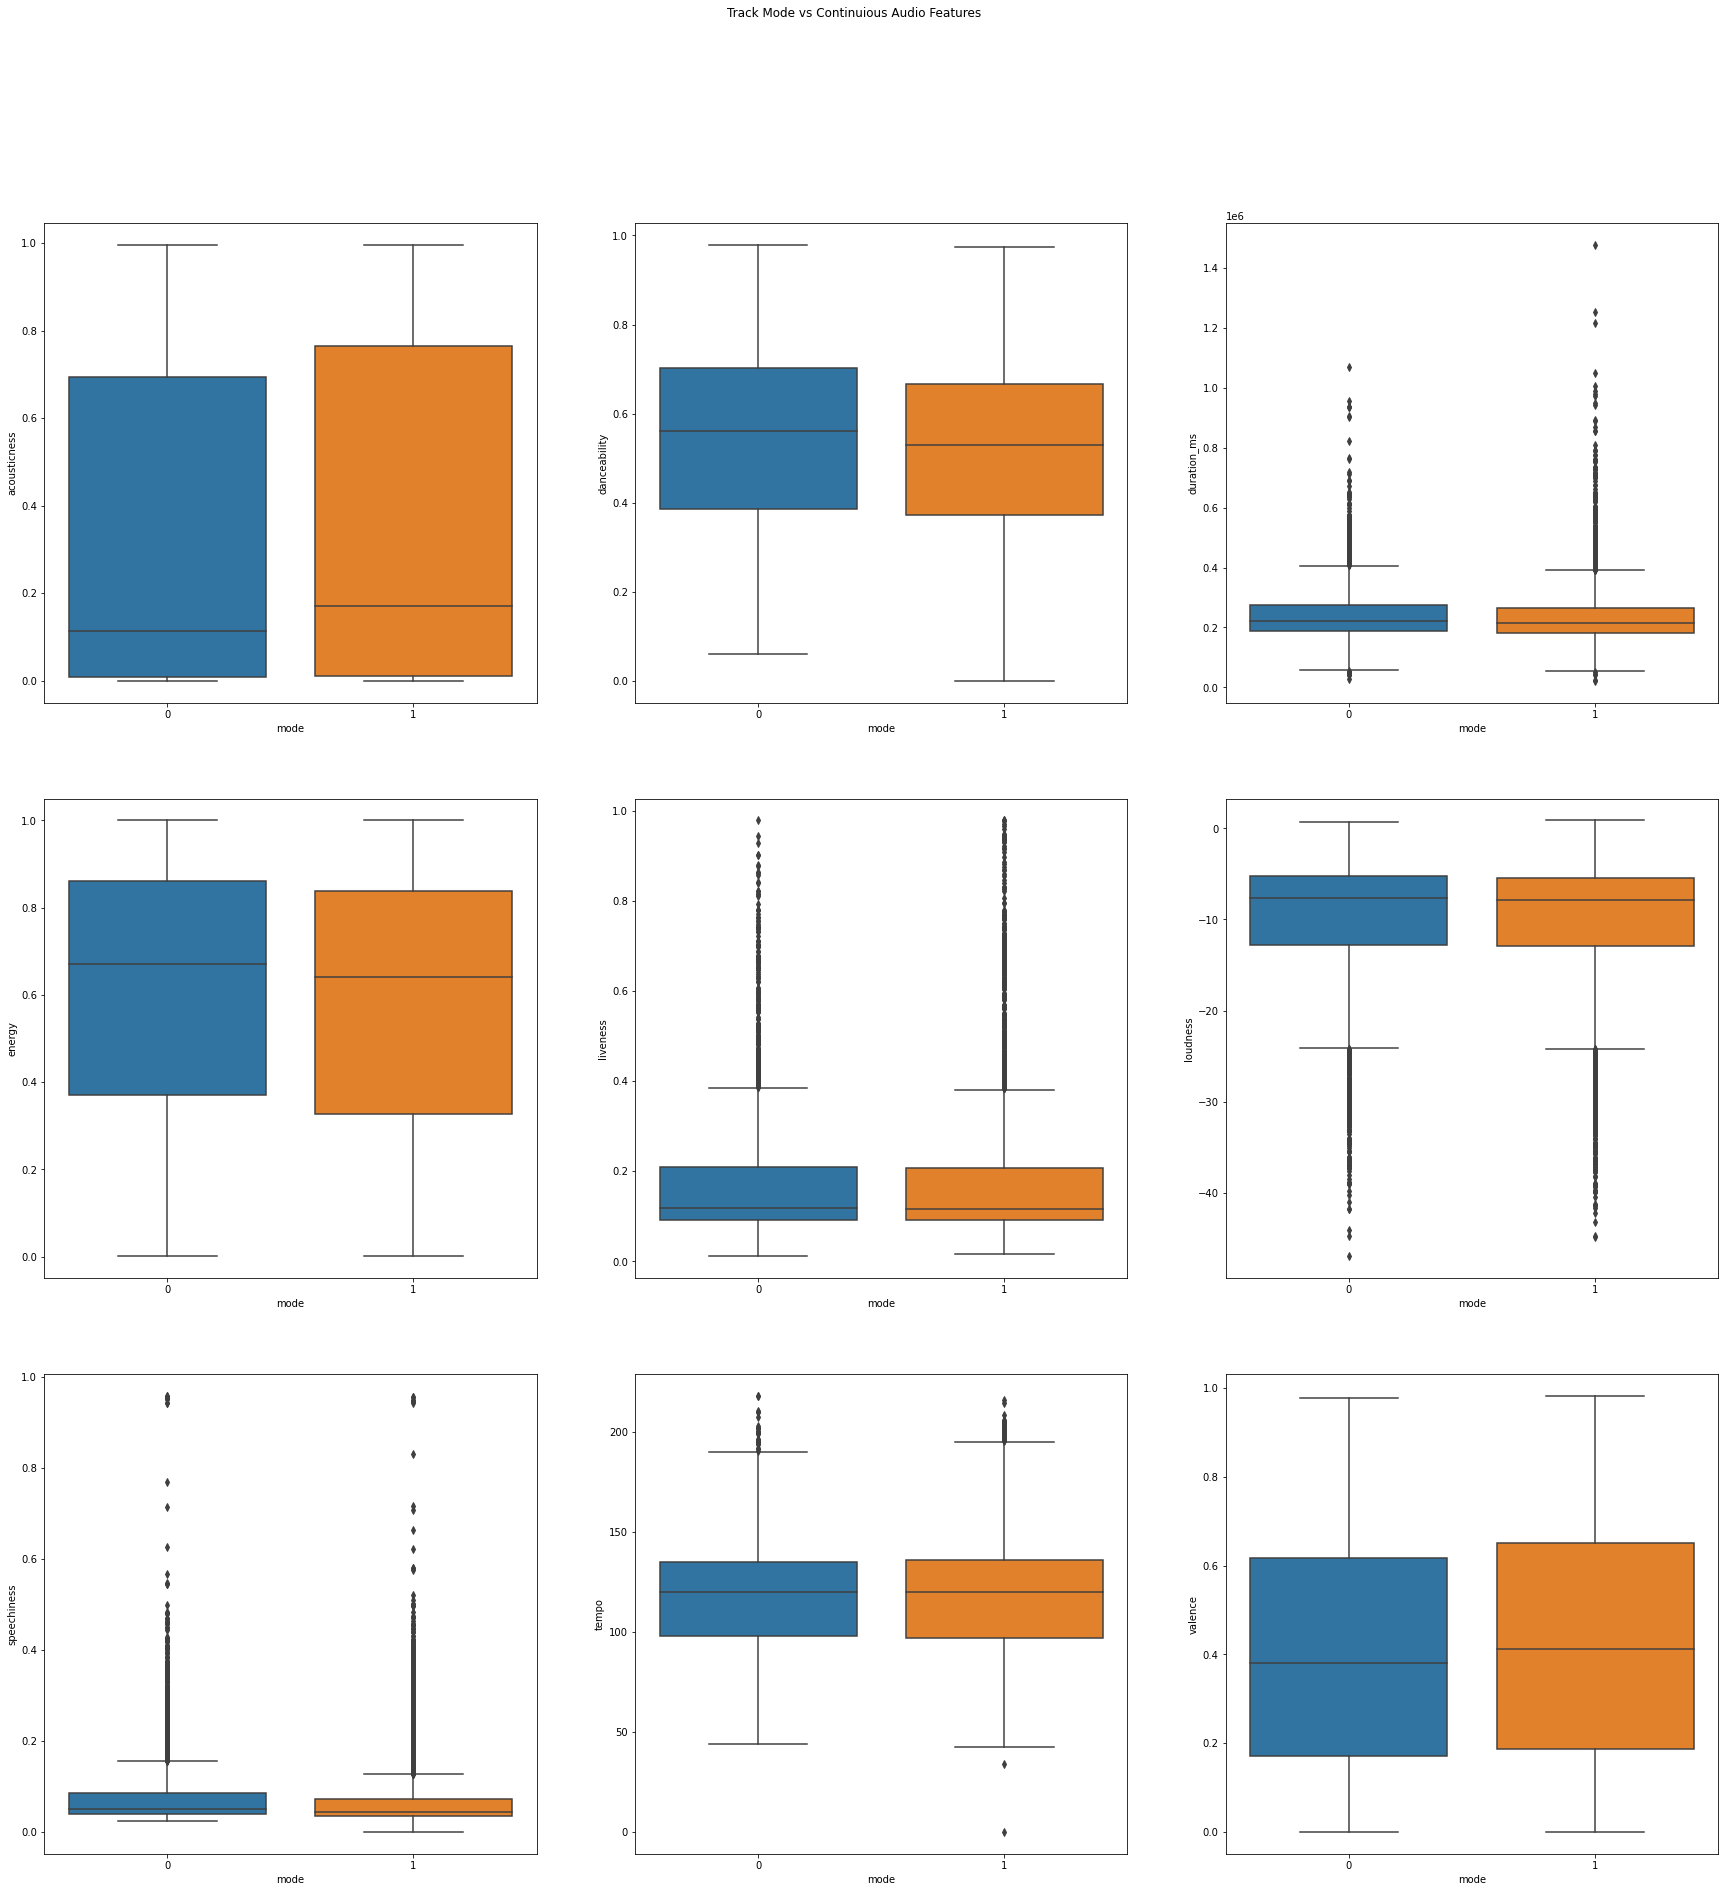

In [58]:
fig, axes = plt.subplots(3,3,figsize=(30, 30))
fig.suptitle("Track Mode vs Continuious Audio Features")

#acousticness
sns.boxplot(ax = axes[0,0],data = spotify_df, x = "mode", y = 'acousticness')

#danceability
sns.boxplot(ax = axes[0,1],data = spotify_df, x = "mode", y = 'danceability')

#duration_ms
sns.boxplot(ax = axes[0,2],data = spotify_df, x = "mode", y = 'duration_ms')

#energy
sns.boxplot(ax = axes[1,0],data = spotify_df, x = "mode", y = 'energy')

#liveness
sns.boxplot(ax = axes[1,1],data = spotify_df, x = "mode", y = 'liveness')

#loudness
sns.boxplot(ax = axes[1,2],data = spotify_df, x = "mode", y = 'loudness')

#speechiness
sns.boxplot(ax = axes[2,0],data = spotify_df, x = "mode", y = 'speechiness')

#tempo
sns.boxplot(ax = axes[2,1],data = spotify_df, x = "mode", y = 'tempo')

#valence
sns.boxplot(ax = axes[2,2],data = spotify_df, x = "mode", y = 'valence')


 ##### Notes 
 -  The mode of a song doesn't appear to have much effect on the various other factors of a track

#### time_signature

From [Spotify Web API refrence](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) 

<blockquote>
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
</blockquote> 

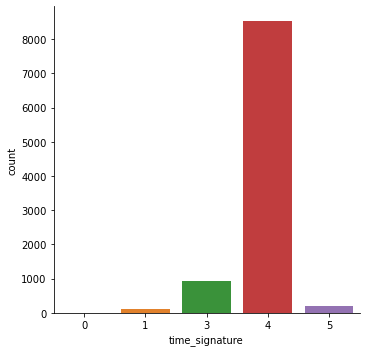

In [59]:
sns.catplot(x='time_signature', kind = 'count', data = spotify_df)

 - An overwheming majority of tracks are in 4/4 time

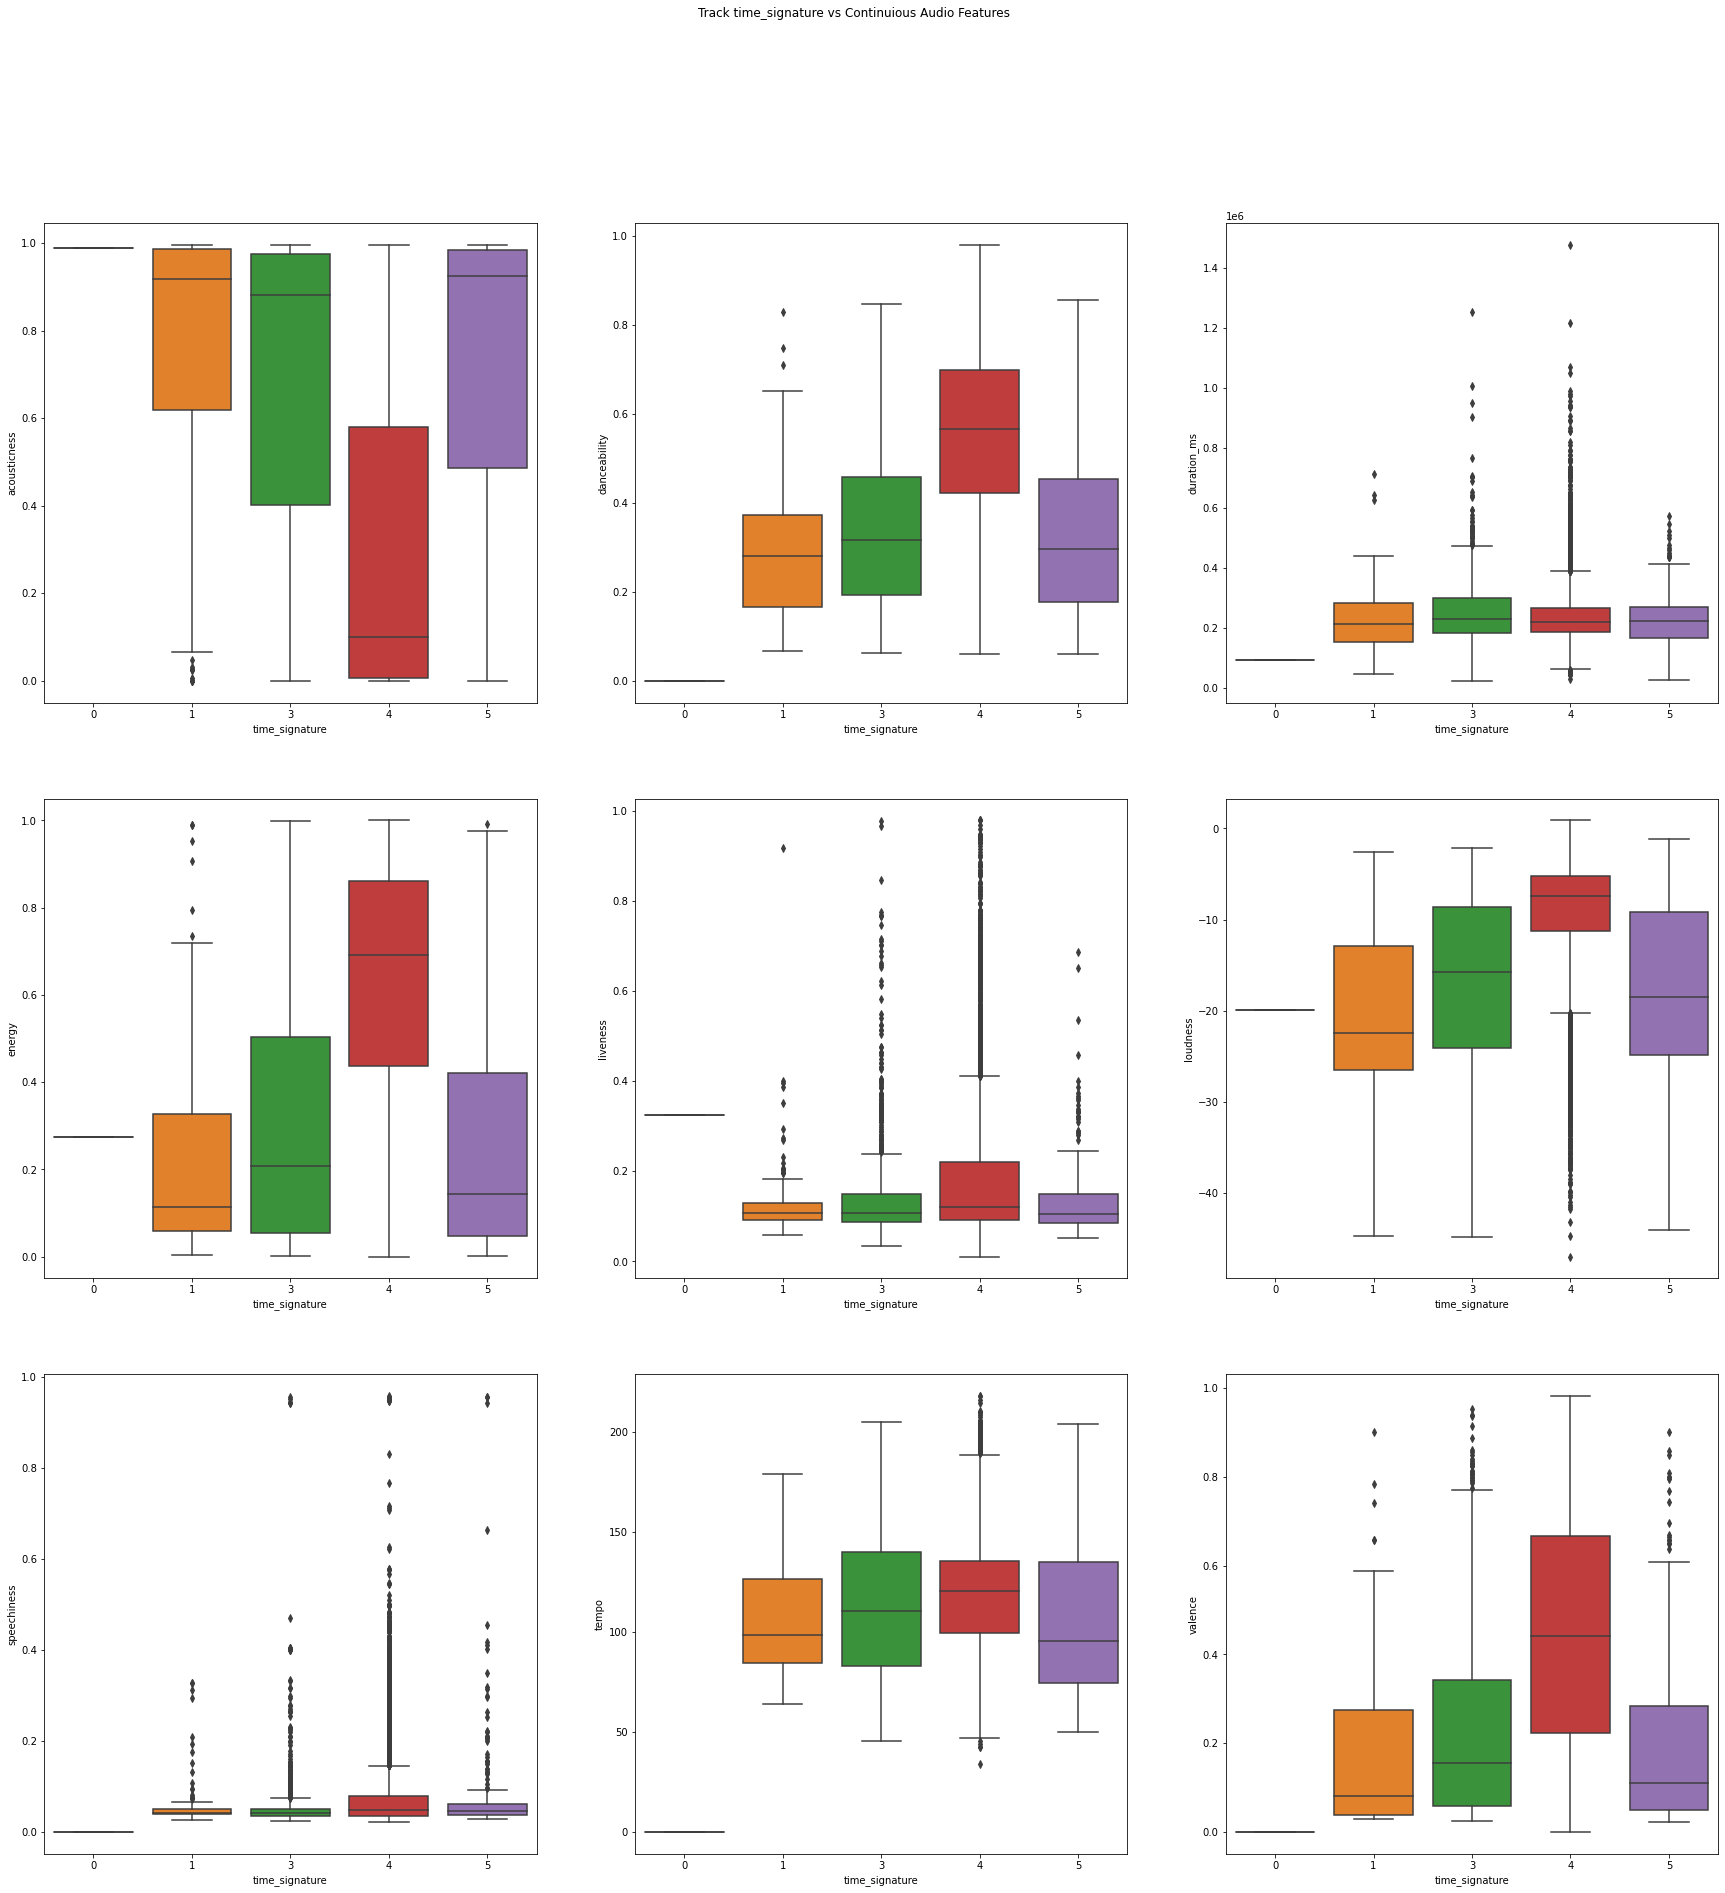

In [60]:
fig, axes = plt.subplots(3,3,figsize=(30, 30))
fig.suptitle("Track time_signature vs Continuious Audio Features")

#acousticness
sns.boxplot(ax = axes[0,0],data = spotify_df, x = "time_signature", y = 'acousticness')

#danceability
sns.boxplot(ax = axes[0,1],data = spotify_df, x = "time_signature", y = 'danceability')

#duration_ms
sns.boxplot(ax = axes[0,2],data = spotify_df, x = "time_signature", y = 'duration_ms')

#energy
sns.boxplot(ax = axes[1,0],data = spotify_df, x = "time_signature", y = 'energy')

#liveness
sns.boxplot(ax = axes[1,1],data = spotify_df, x = "time_signature", y = 'liveness')

#loudness
sns.boxplot(ax = axes[1,2],data = spotify_df, x = "time_signature", y = 'loudness')

#speechiness
sns.boxplot(ax = axes[2,0],data = spotify_df, x = "time_signature", y = 'speechiness')

#tempo
sns.boxplot(ax = axes[2,1],data = spotify_df, x = "time_signature", y = 'tempo')

#valence
sns.boxplot(ax = axes[2,2],data = spotify_df, x = "time_signature", y = 'valence')


 ##### Notes
 
 - A lot of highly acoustic tracks are not in a 4/4 time signature, time signature could be a good predictor
 - Some of these results could be caused by the fact that 4/4 time makes up a majority of all tracks in the dataset


## **Part 5:** Looking at the Differences among Spotify Categories

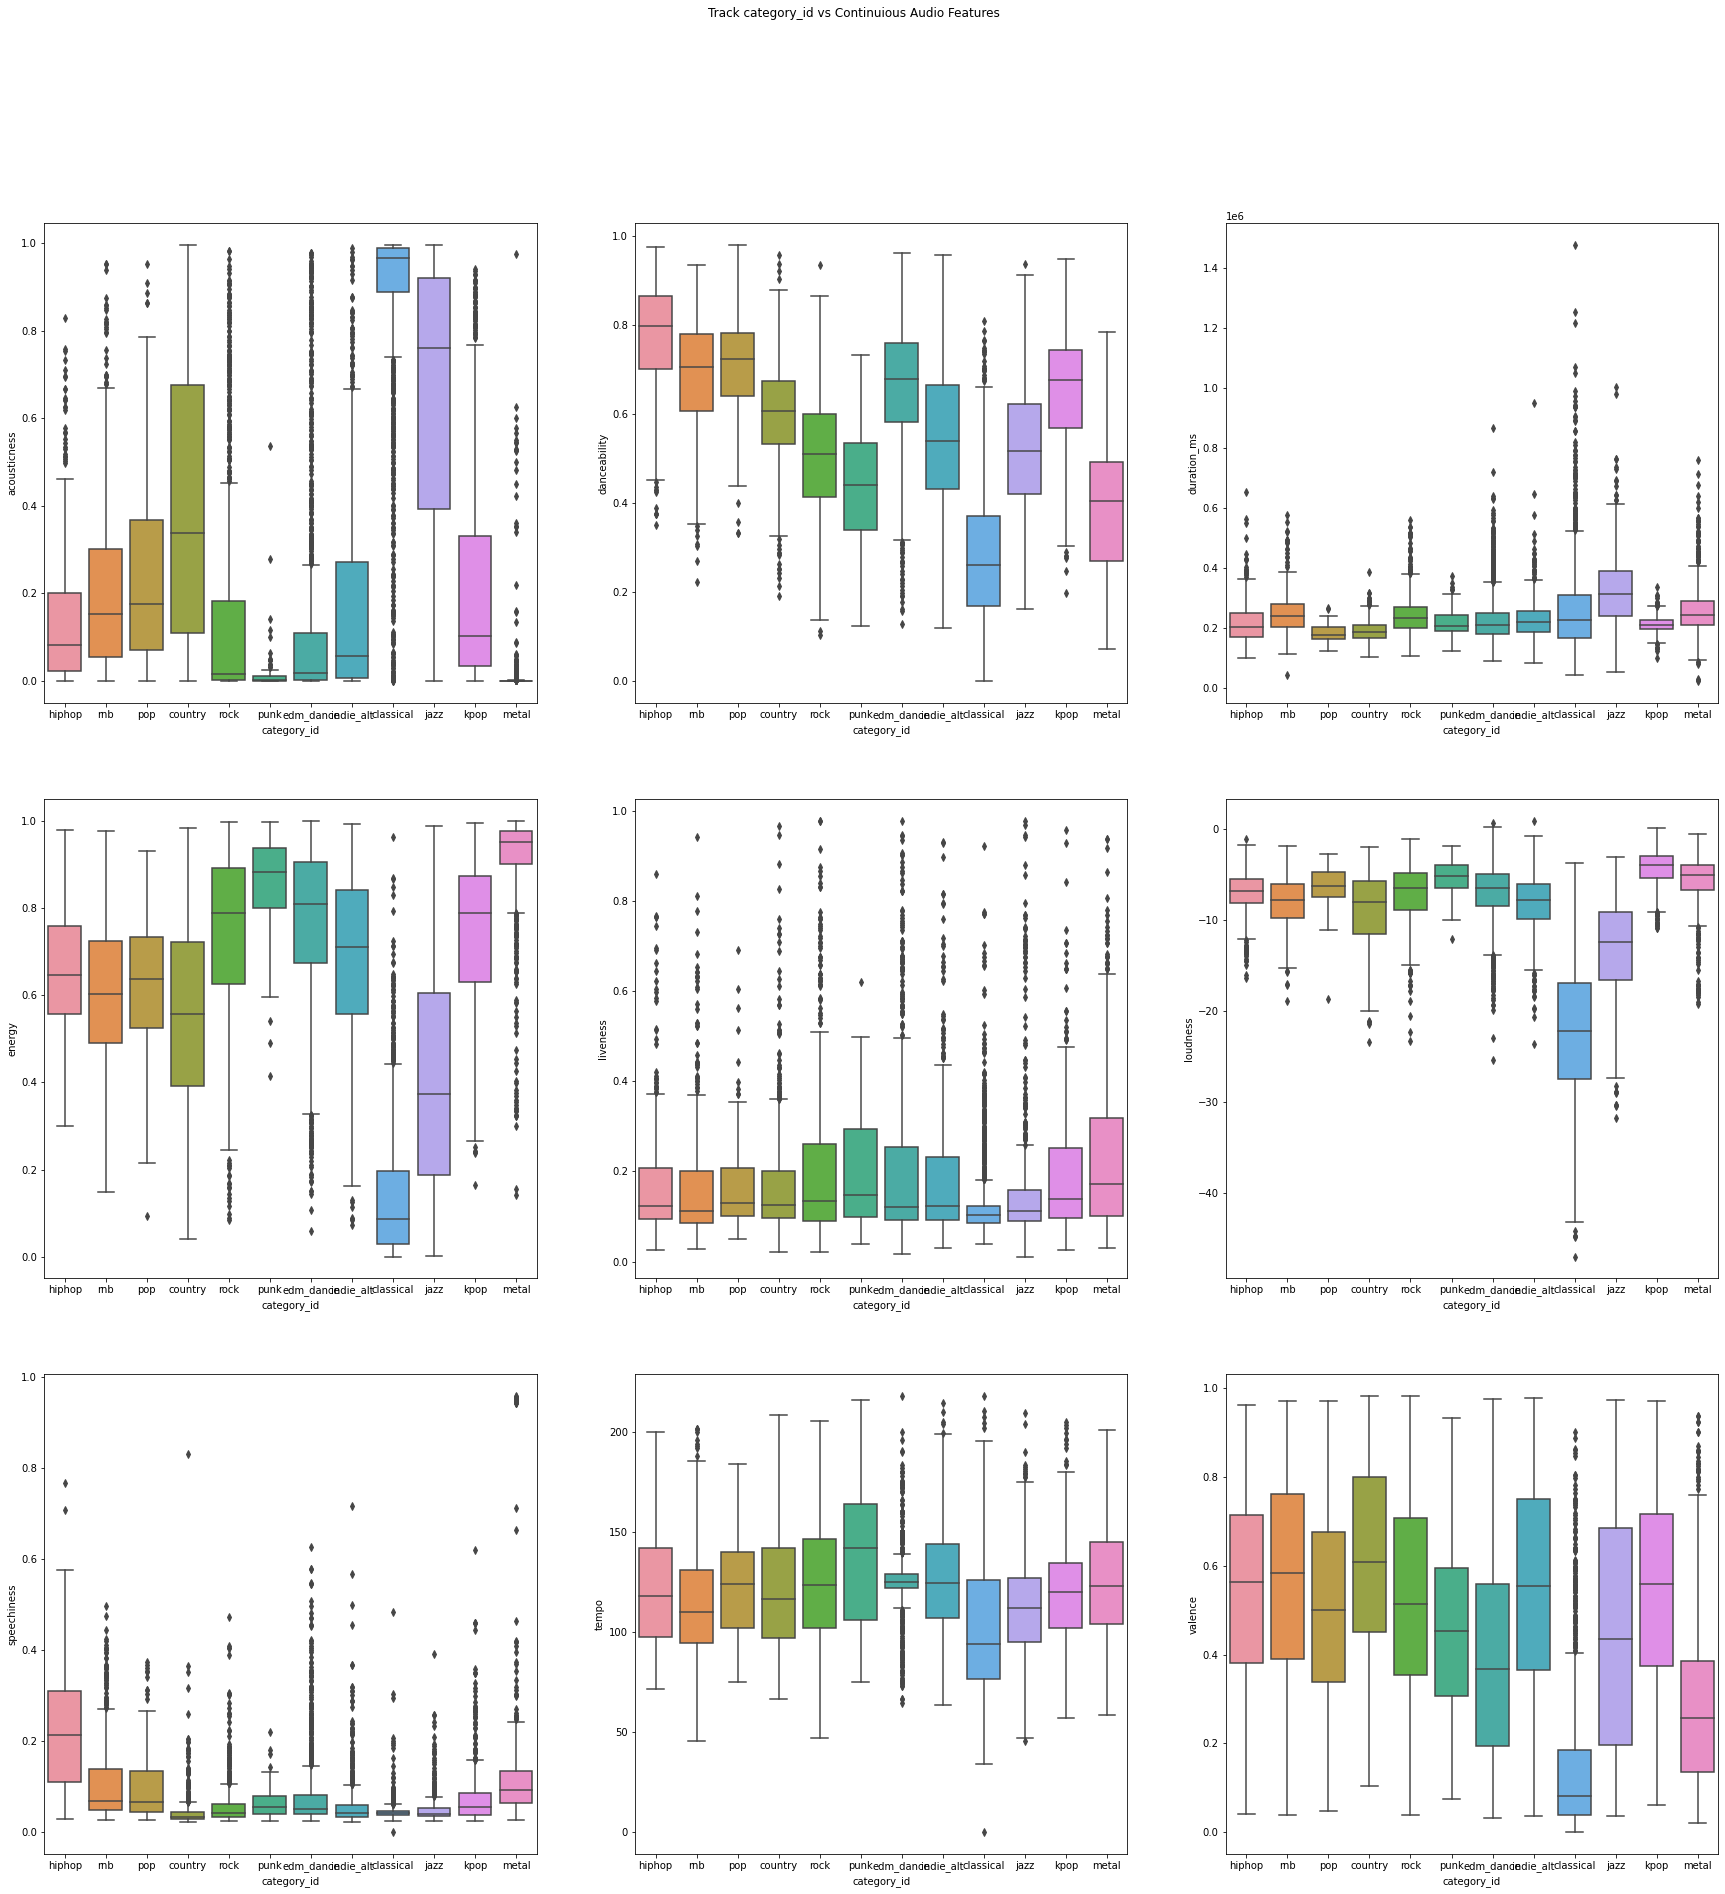

In [61]:
#How the Audio Features differ among the differnt spotify category_id
fig, axes = plt.subplots(3,3,figsize=(30, 30))
fig.suptitle("Track category_id vs Continuious Audio Features")

#acousticness
sns.boxplot(ax = axes[0,0],data = spotify_df, x = "category_id", y = 'acousticness')

#danceability
sns.boxplot(ax = axes[0,1],data = spotify_df, x = "category_id", y = 'danceability')

#duration_ms
sns.boxplot(ax = axes[0,2],data = spotify_df, x = "category_id", y = 'duration_ms')

#energy
sns.boxplot(ax = axes[1,0],data = spotify_df, x = "category_id", y = 'energy')

#liveness
sns.boxplot(ax = axes[1,1],data = spotify_df, x = "category_id", y = 'liveness')

#loudness
sns.boxplot(ax = axes[1,2],data = spotify_df, x = "category_id", y = 'loudness')

#speechiness
sns.boxplot(ax = axes[2,0],data = spotify_df, x = "category_id", y = 'speechiness')

#tempo
sns.boxplot(ax = axes[2,1],data = spotify_df, x = "category_id", y = 'tempo')

#valence
sns.boxplot(ax = axes[2,2],data = spotify_df, x = "category_id", y = 'valence')

##### Notes
 
 - Both classical and jazz music have significantly higher acousticness, where metal and punk have the lowest mean. 
 - Hip hop is the most danceable category 
 - All the categories have similar mean track duration, but interestingly classical has a high number of outliers with longer works of music 
 - Metal and Punk have highest energy,  while liveness is fairly evenly distributed across the categories
 - Hip hop is the most lyrically dense category, but there are some outliers  of high speech in metal and country that might be worth looking into 
 - Across the categories, all have a simmialr porpotion of tracks that are live recordings. (liveness)



## **Part 6:** Conclusions 


Looking across all the different Spotify categories, we have seen that there are some select categories that tend to push to the upper and lower ends of features. Such as Metal, that has the lowest mean acousticness and the highest mean energy.  These Spotify features world be interesting to look into further, with the help of additional track metadata such as spotify popularity ranking, number of track plays and other social statistics.  Some issues I encountered with the data is that some spotify categories have a disproportionately higher track count compared to others. As a result Classical is over represented, with 1898 total tracks  in the dataset while both Punk (100 tracks) and Pop (135) tracks are under represented.  Throughout this project I learned that Spotify reports genera as a different variable as track category. For further research I would rewrite my code to assemble an equal number of tracks per spotify genera and see if some of the initial insights still hold true. 
 
